# <center> Task 1: Credit Card Default Prediction </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=69) #set the randome seed for the document

filepath= "C:/Users/uttam/anaconda3/Technocolabs/MinorProj2/Datasets/default_of_credit_card_clients.xls"
df = pd.read_excel(filepath)


In [2]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Renaming columns for more readbality
df.rename(columns={'SEX':'GENDER',
                   'default payment next month':'DEFAULT',} , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  int64 
 2   GENDER     30000 non-null  int64 
 3   EDUCATION  30000 non-null  int64 
 4   MARRIAGE   30000 non-null  int64 
 5   AGE        30000 non-null  int64 
 6   PAY_1      30000 non-null  object
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [5]:
df.shape

(30000, 25)

In [6]:
#Contains duplicate IDs
df['ID'].nunique()

29687

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head()

e39d23fe-aa5f    2
9ac5d94f-ed71    2
5718f600-12ac    2
693a0664-bde6    2
e7f574b9-0581    2
Name: ID, dtype: int64

In [8]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

## Bool Masks

In [9]:
np.random.seed(seed=24)
random_integers = np.random.randint(low=1,high=5,size=100)

In [10]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [11]:
is_equal_to_3 = (random_integers == 3)

In [12]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [13]:
sum(is_equal_to_3)

22

In [14]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## Verification on Data Integrity

In [15]:
dupe_mask = (id_counts == 2)
dupe_mask[0:5]

e39d23fe-aa5f    True
9ac5d94f-ed71    True
5718f600-12ac    True
693a0664-bde6    True
e7f574b9-0581    True
Name: ID, dtype: bool

In [16]:
id_counts.index[0:5]

Index(['e39d23fe-aa5f', '9ac5d94f-ed71', '5718f600-12ac', '693a0664-bde6',
       'e7f574b9-0581'],
      dtype='object')

In [17]:
dupe_ids = id_counts.index[dupe_mask]

In [18]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [19]:
dupe_ids[0:5]

['e39d23fe-aa5f',
 '9ac5d94f-ed71',
 '5718f600-12ac',
 '693a0664-bde6',
 'e7f574b9-0581']

In [20]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
18476,9ac5d94f-ed71,240000,2,2,2,26,0,0,0,0,...,124226,113133,113966,6537,6349,5834,3870,4000,3825,0
18576,9ac5d94f-ed71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19194,5718f600-12ac,380000,2,2,1,33,1,1,2,2,...,354443,354765,354579,29540,74,14301,13000,12800,12800,0
19294,5718f600-12ac,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24221,e39d23fe-aa5f,130000,1,2,1,31,0,0,0,0,...,118293,121312,121162,5000,5000,5000,5000,5000,5000,0
24321,e39d23fe-aa5f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#To see if all entries are 0
df_zero_mask = (df == 0)

In [22]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [23]:
#There are more zero entries than duplicate entries. Let's remove these and check if all duplicates are removed or not
sum(feature_zero_mask)

315

In [24]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
df_clean_1.shape

(29685, 25)

In [25]:
df_clean_1['ID'].nunique()

29685

## Exploring and Cleaning Data

In [26]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         29685 non-null  object
 1   LIMIT_BAL  29685 non-null  int64 
 2   GENDER     29685 non-null  int64 
 3   EDUCATION  29685 non-null  int64 
 4   MARRIAGE   29685 non-null  int64 
 5   AGE        29685 non-null  int64 
 6   PAY_1      29685 non-null  object
 7   PAY_2      29685 non-null  int64 
 8   PAY_3      29685 non-null  int64 
 9   PAY_4      29685 non-null  int64 
 10  PAY_5      29685 non-null  int64 
 11  PAY_6      29685 non-null  int64 
 12  BILL_AMT1  29685 non-null  int64 
 13  BILL_AMT2  29685 non-null  int64 
 14  BILL_AMT3  29685 non-null  int64 
 15  BILL_AMT4  29685 non-null  int64 
 16  BILL_AMT5  29685 non-null  int64 
 17  BILL_AMT6  29685 non-null  int64 
 18  PAY_AMT1   29685 non-null  int64 
 19  PAY_AMT2   29685 non-null  int64 
 20  PAY_AMT3   29685 non-null  i

In [27]:
df_clean_1.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [29]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [30]:
# Let's remove these unaivailable rows also
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [31]:
sum(valid_pay_1_mask)

26664

In [32]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [33]:
#Removed unavaiable values successfully
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [34]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## Exploring Credit Limit

In [35]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024097863648>,
      dtype=object)

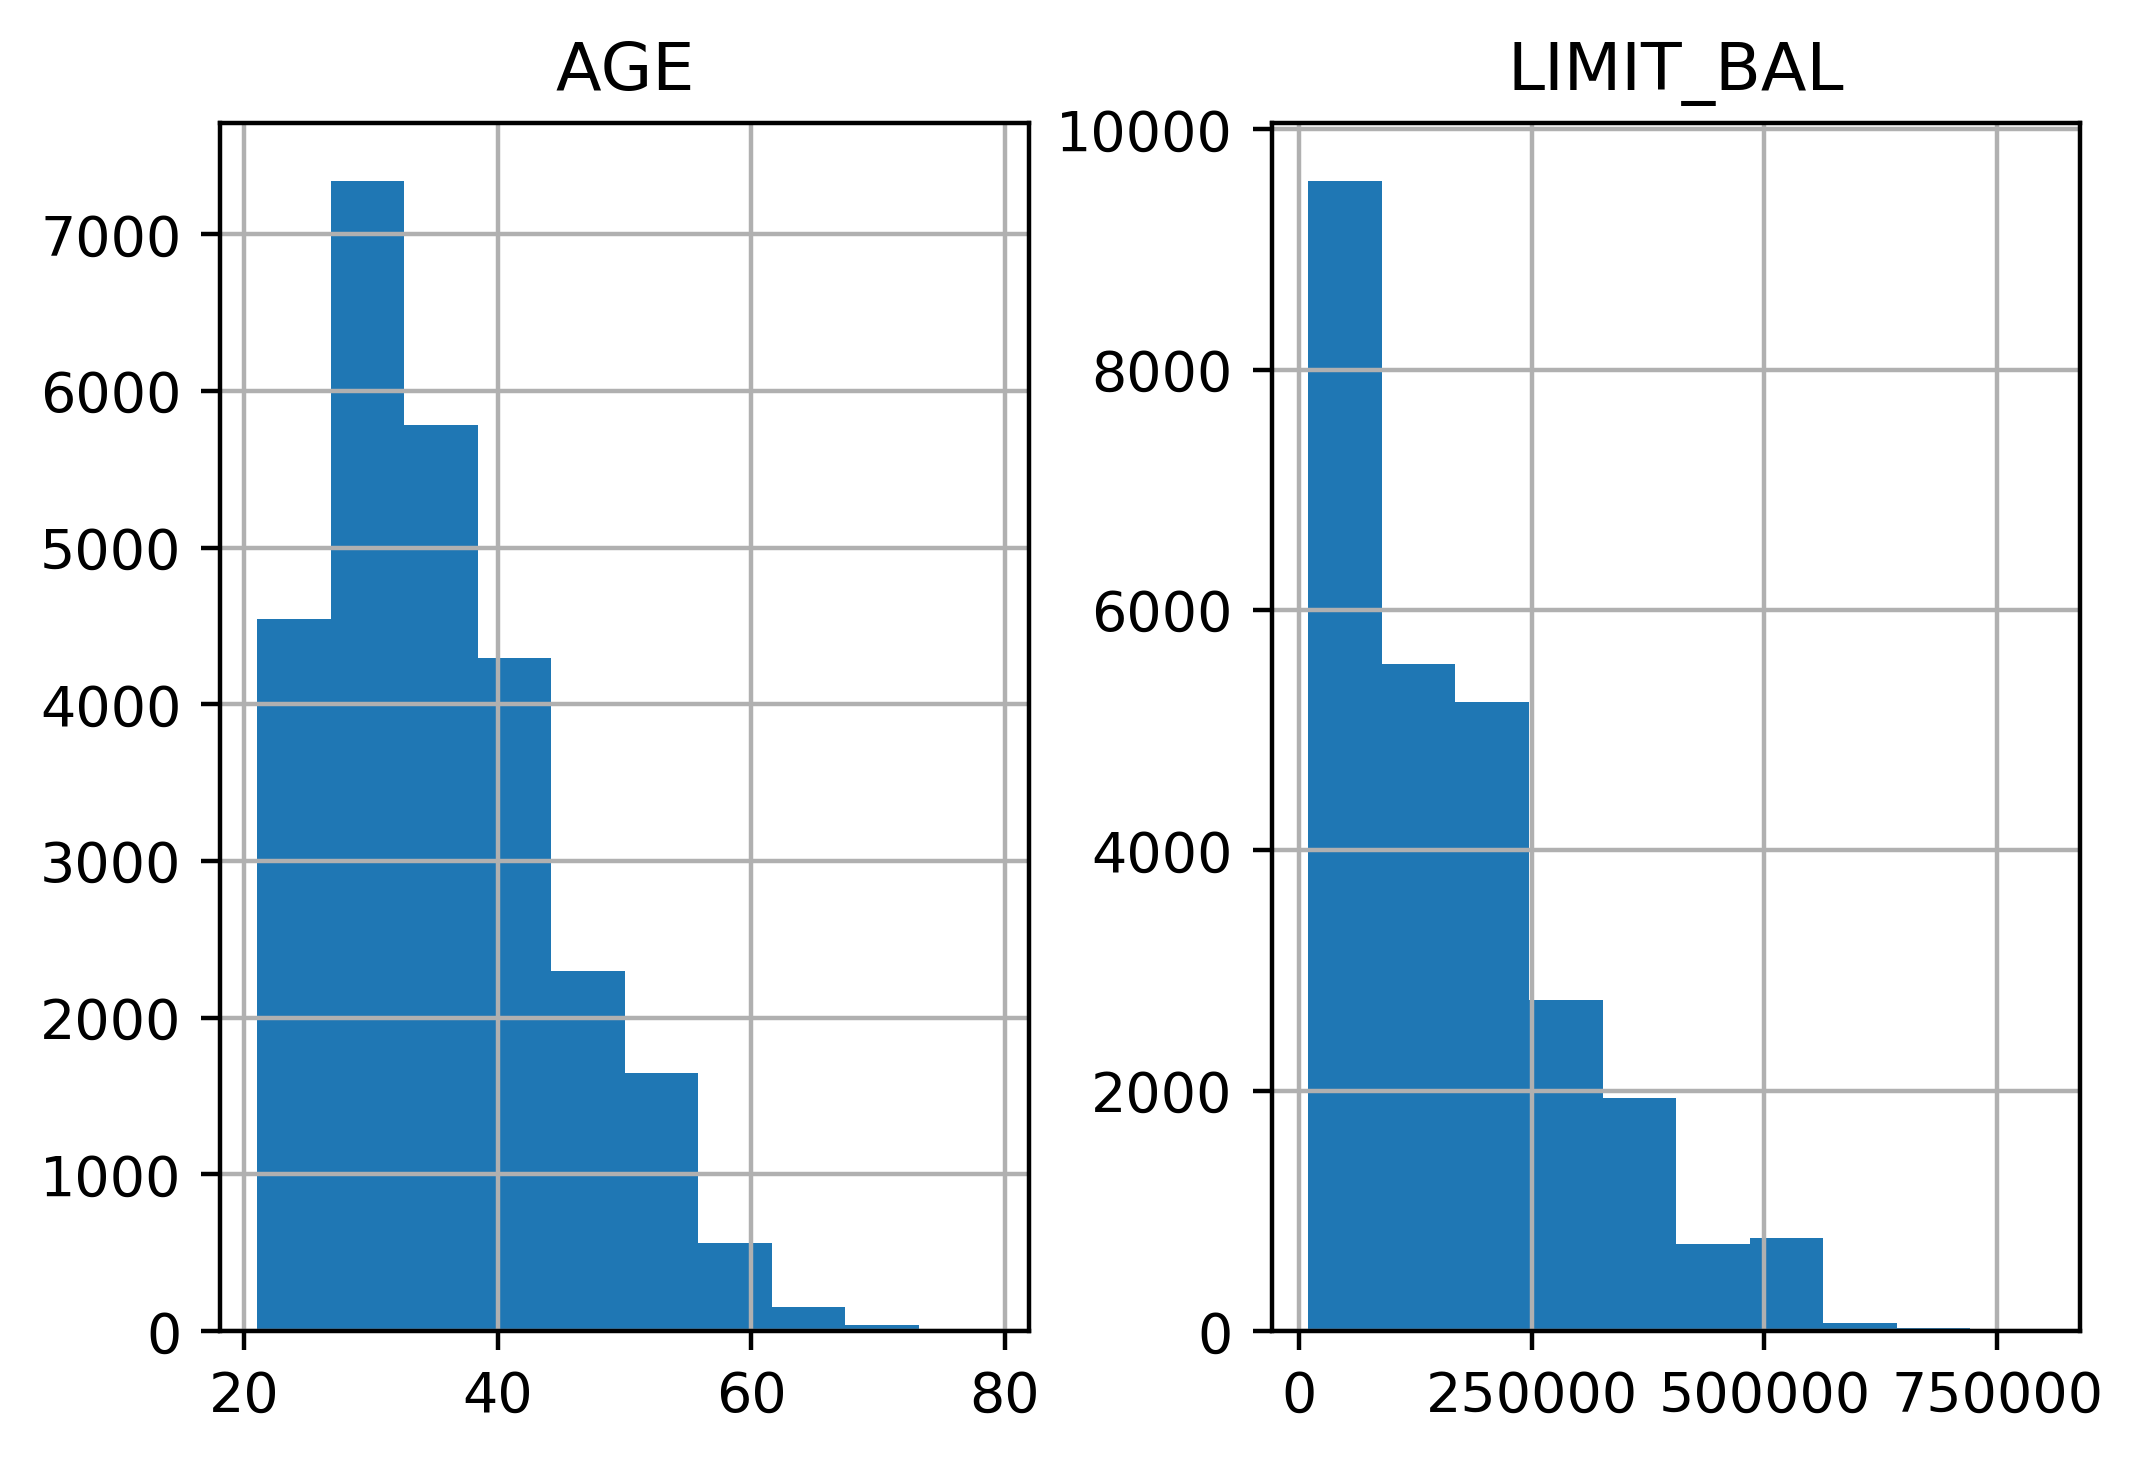

In [36]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [37]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [38]:
df_clean_2['EDUCATION'].value_counts()


2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Education -> (1 = graduate school, 2 = university, 3 = high school, 4 = others)
Assign unknown categories to others column

In [39]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

#### MARRIAGE

In [40]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [41]:
#Changing to -> (1 = married; 2 = single; 3 = others).
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Deep Diving

Text(0.5, 0, 'Education level: ordinal encoding')

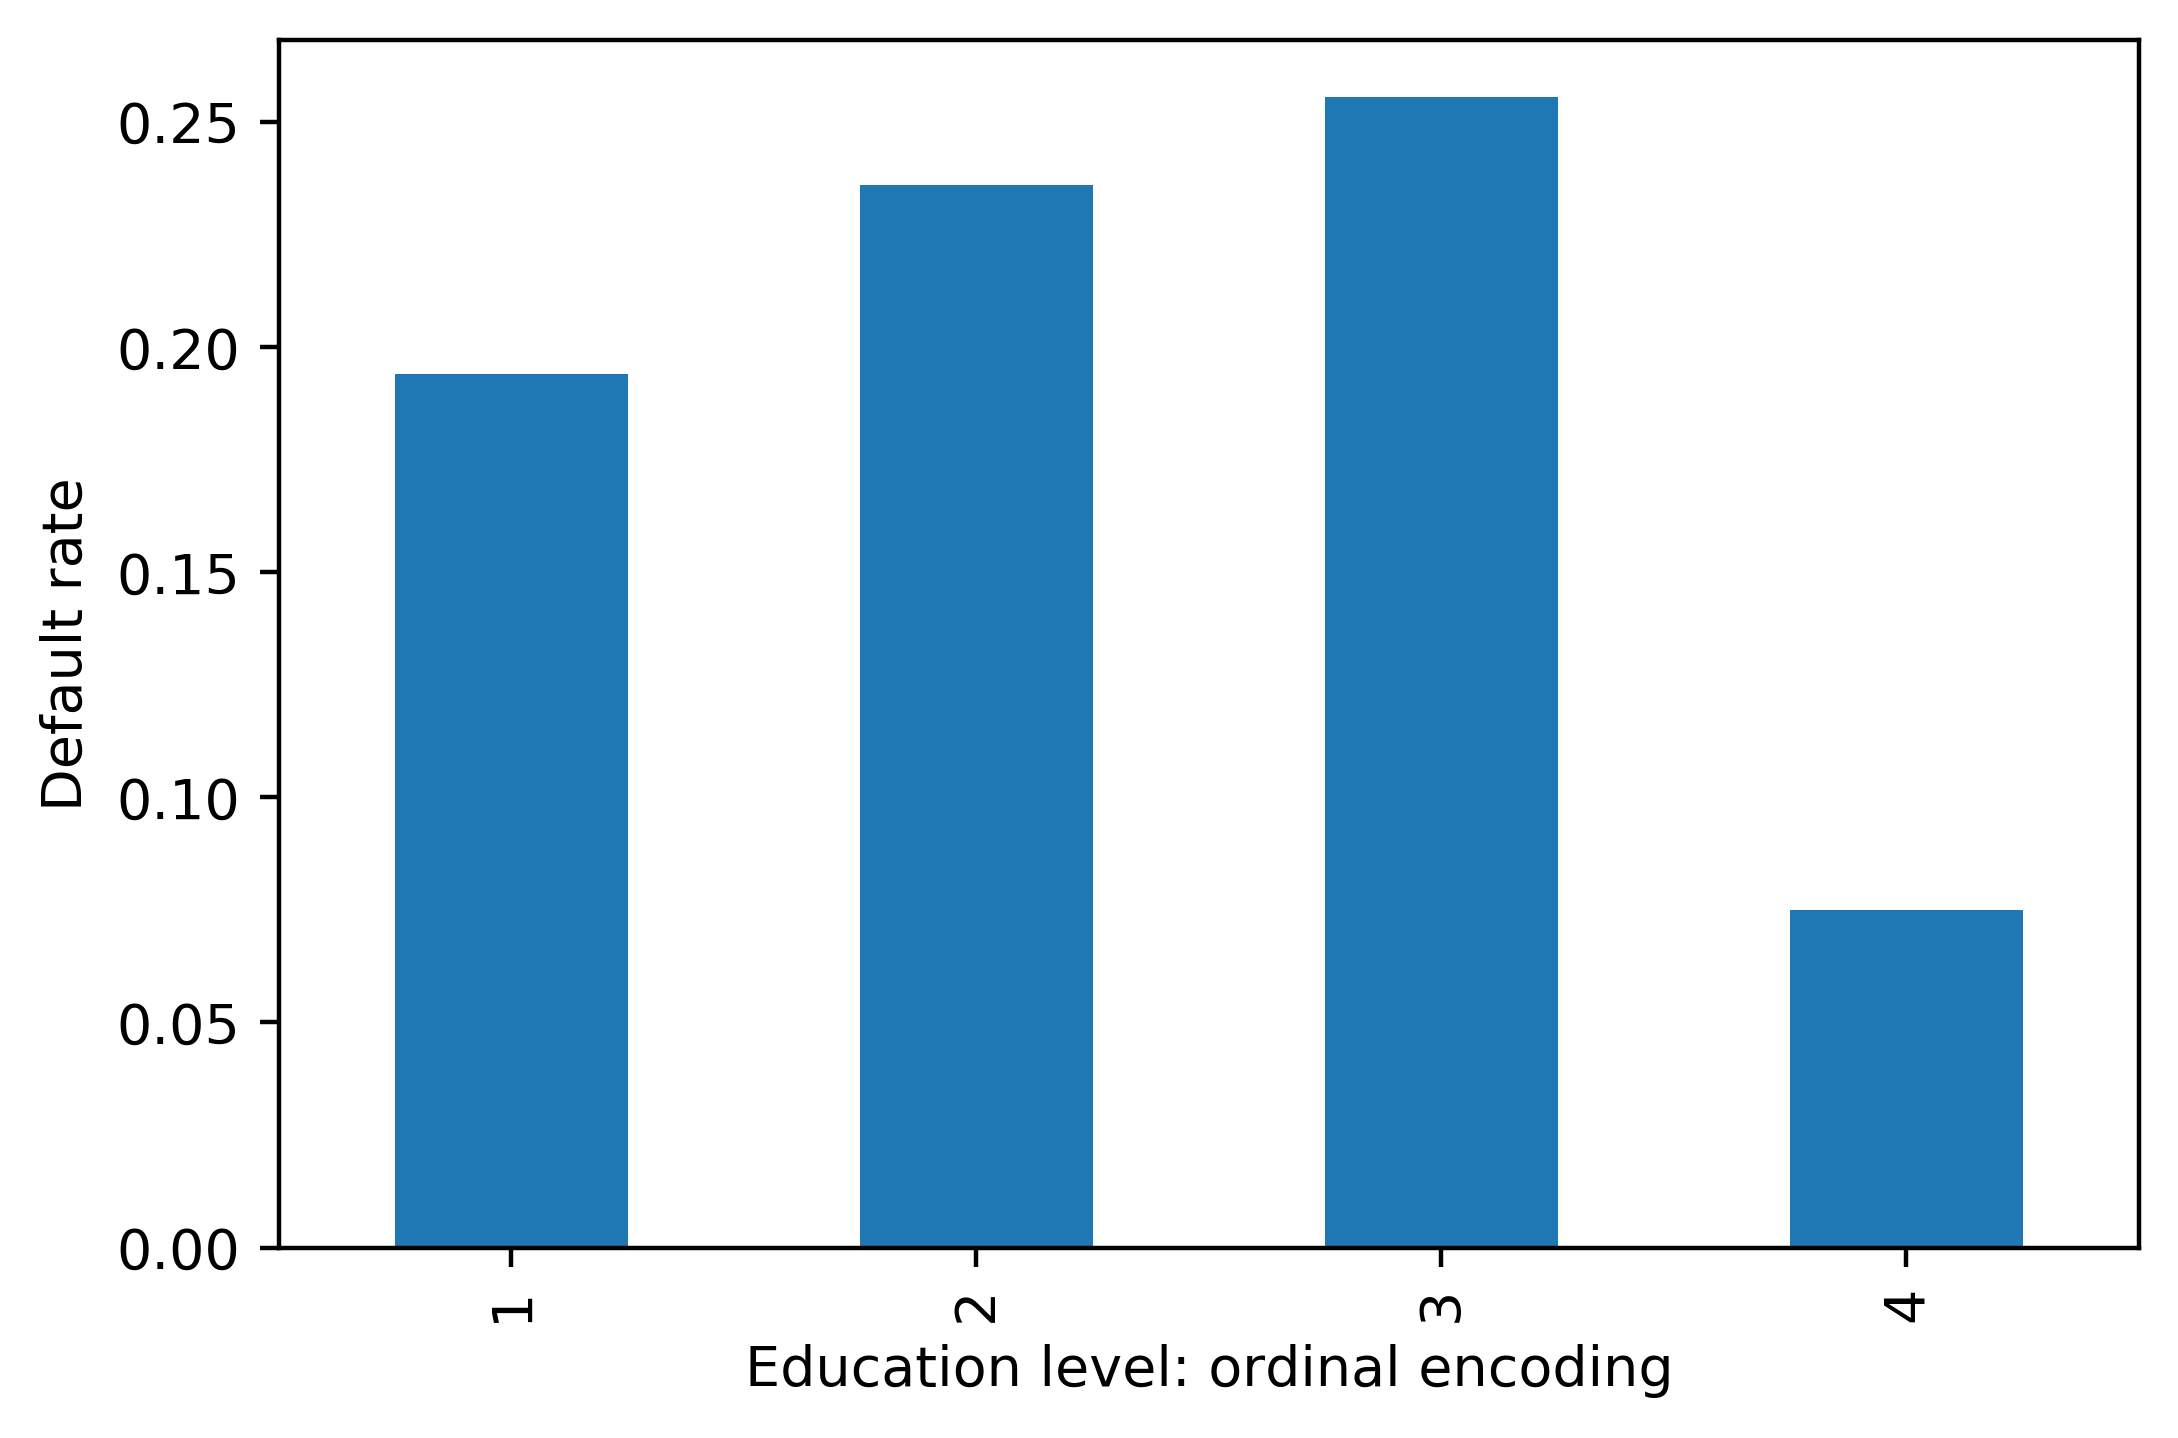

In [43]:
df_clean_2.groupby('EDUCATION').agg({'DEFAULT':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

## Implementing OHE

In [44]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

In [45]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [46]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [47]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [48]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [49]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [50]:
df_with_ohe.to_csv('C:/Users/uttam/anaconda3/Technocolabs/MinorProj2/Datasets/cleaned_data.csv', index=False)

## Exploring Financial Features

In [51]:
df = pd.read_csv('C:/Users/uttam/anaconda3/Technocolabs/MinorProj2/Datasets/cleaned_data.csv')

In [52]:
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [53]:
df.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'EDUCATION_CAT', 'graduate school', 'high school', 'others',
       'university'],
      dtype='object')

In [54]:
df.shape

(26664, 30)

In [55]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [56]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [57]:
pay_feats[0]

'PAY_1'

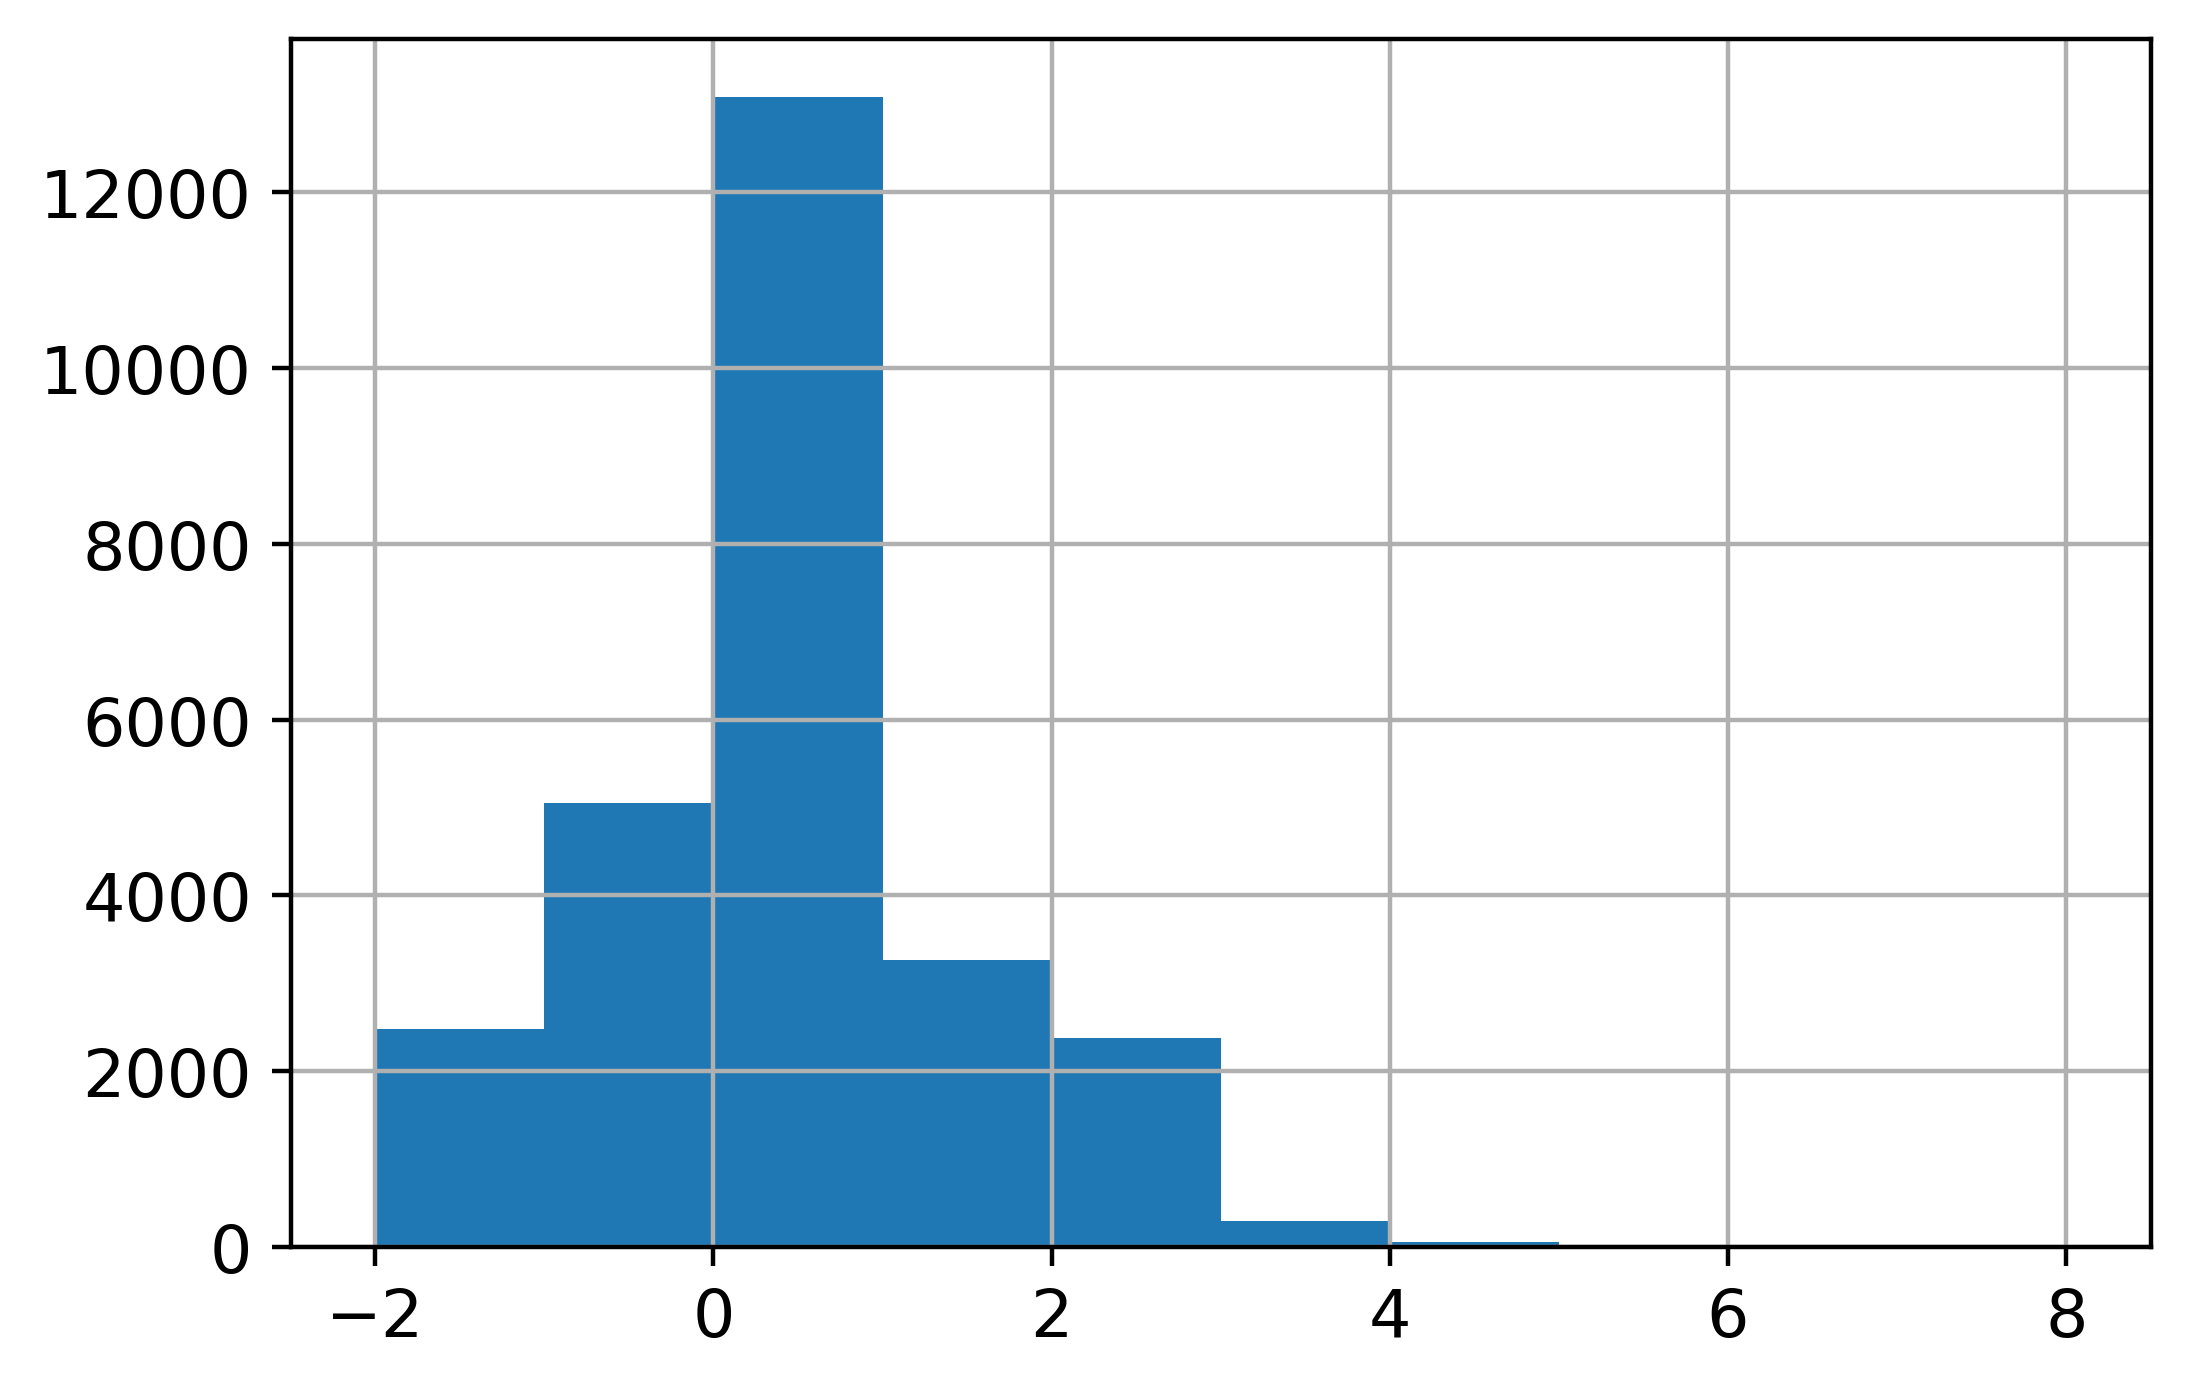

In [58]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12
df[pay_feats[0]].hist()

In [59]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

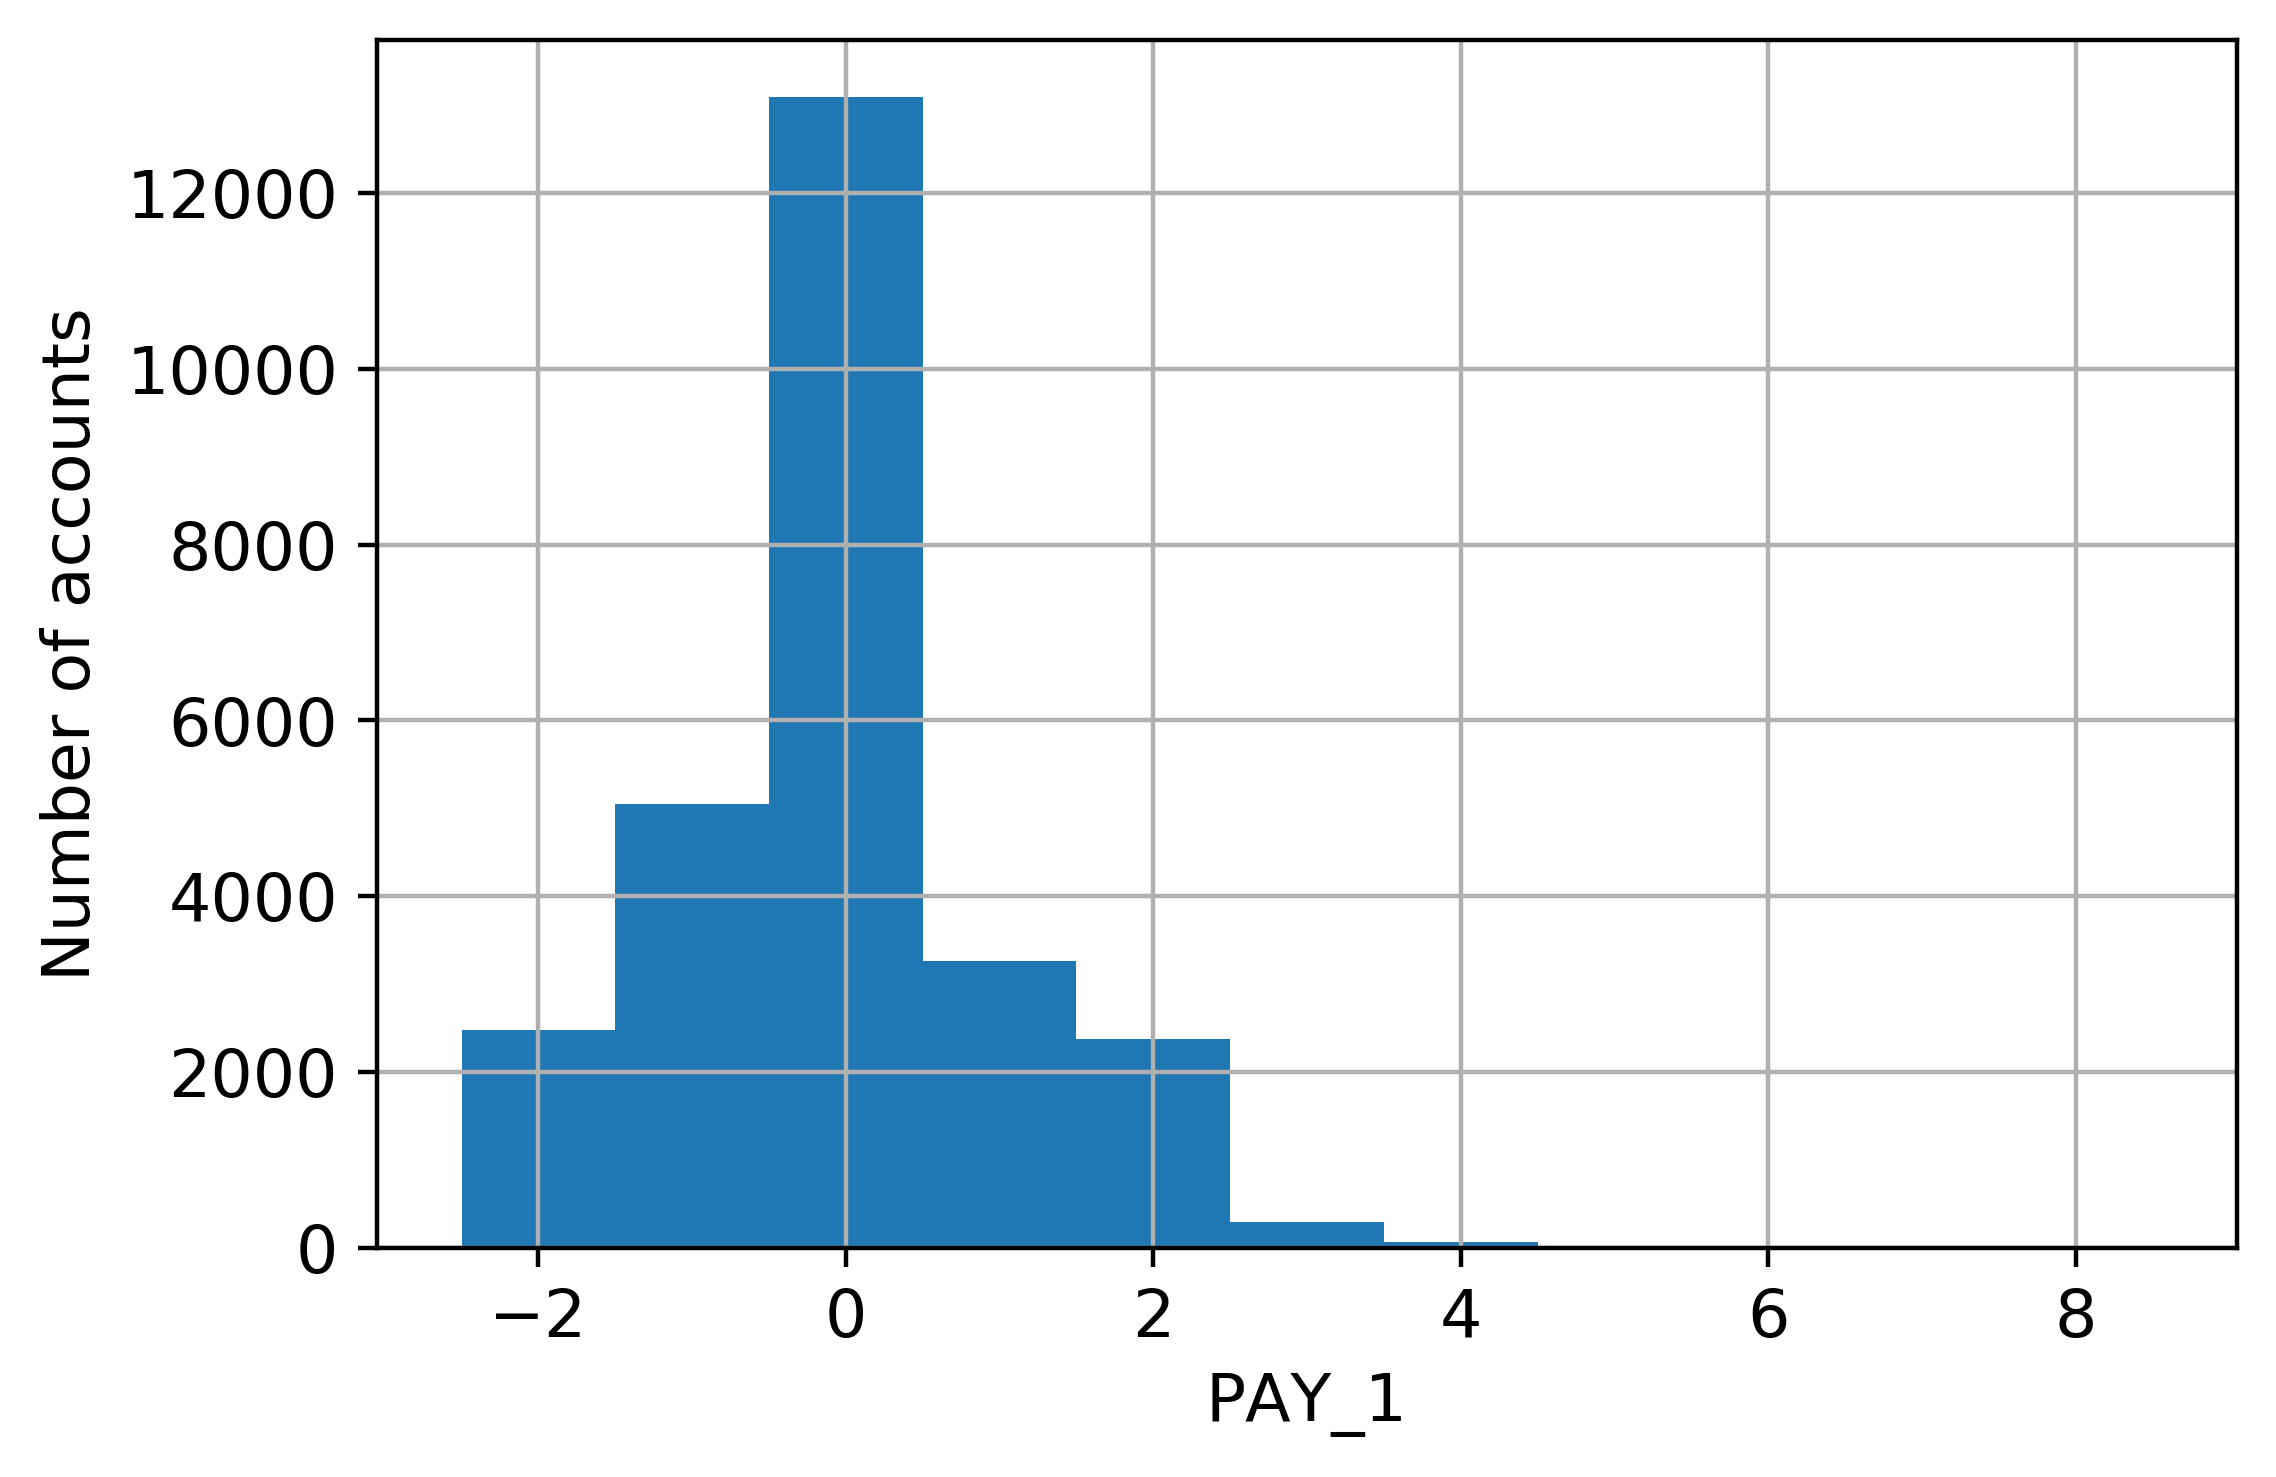

In [60]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024095D7ED88>,
      dtype=object)

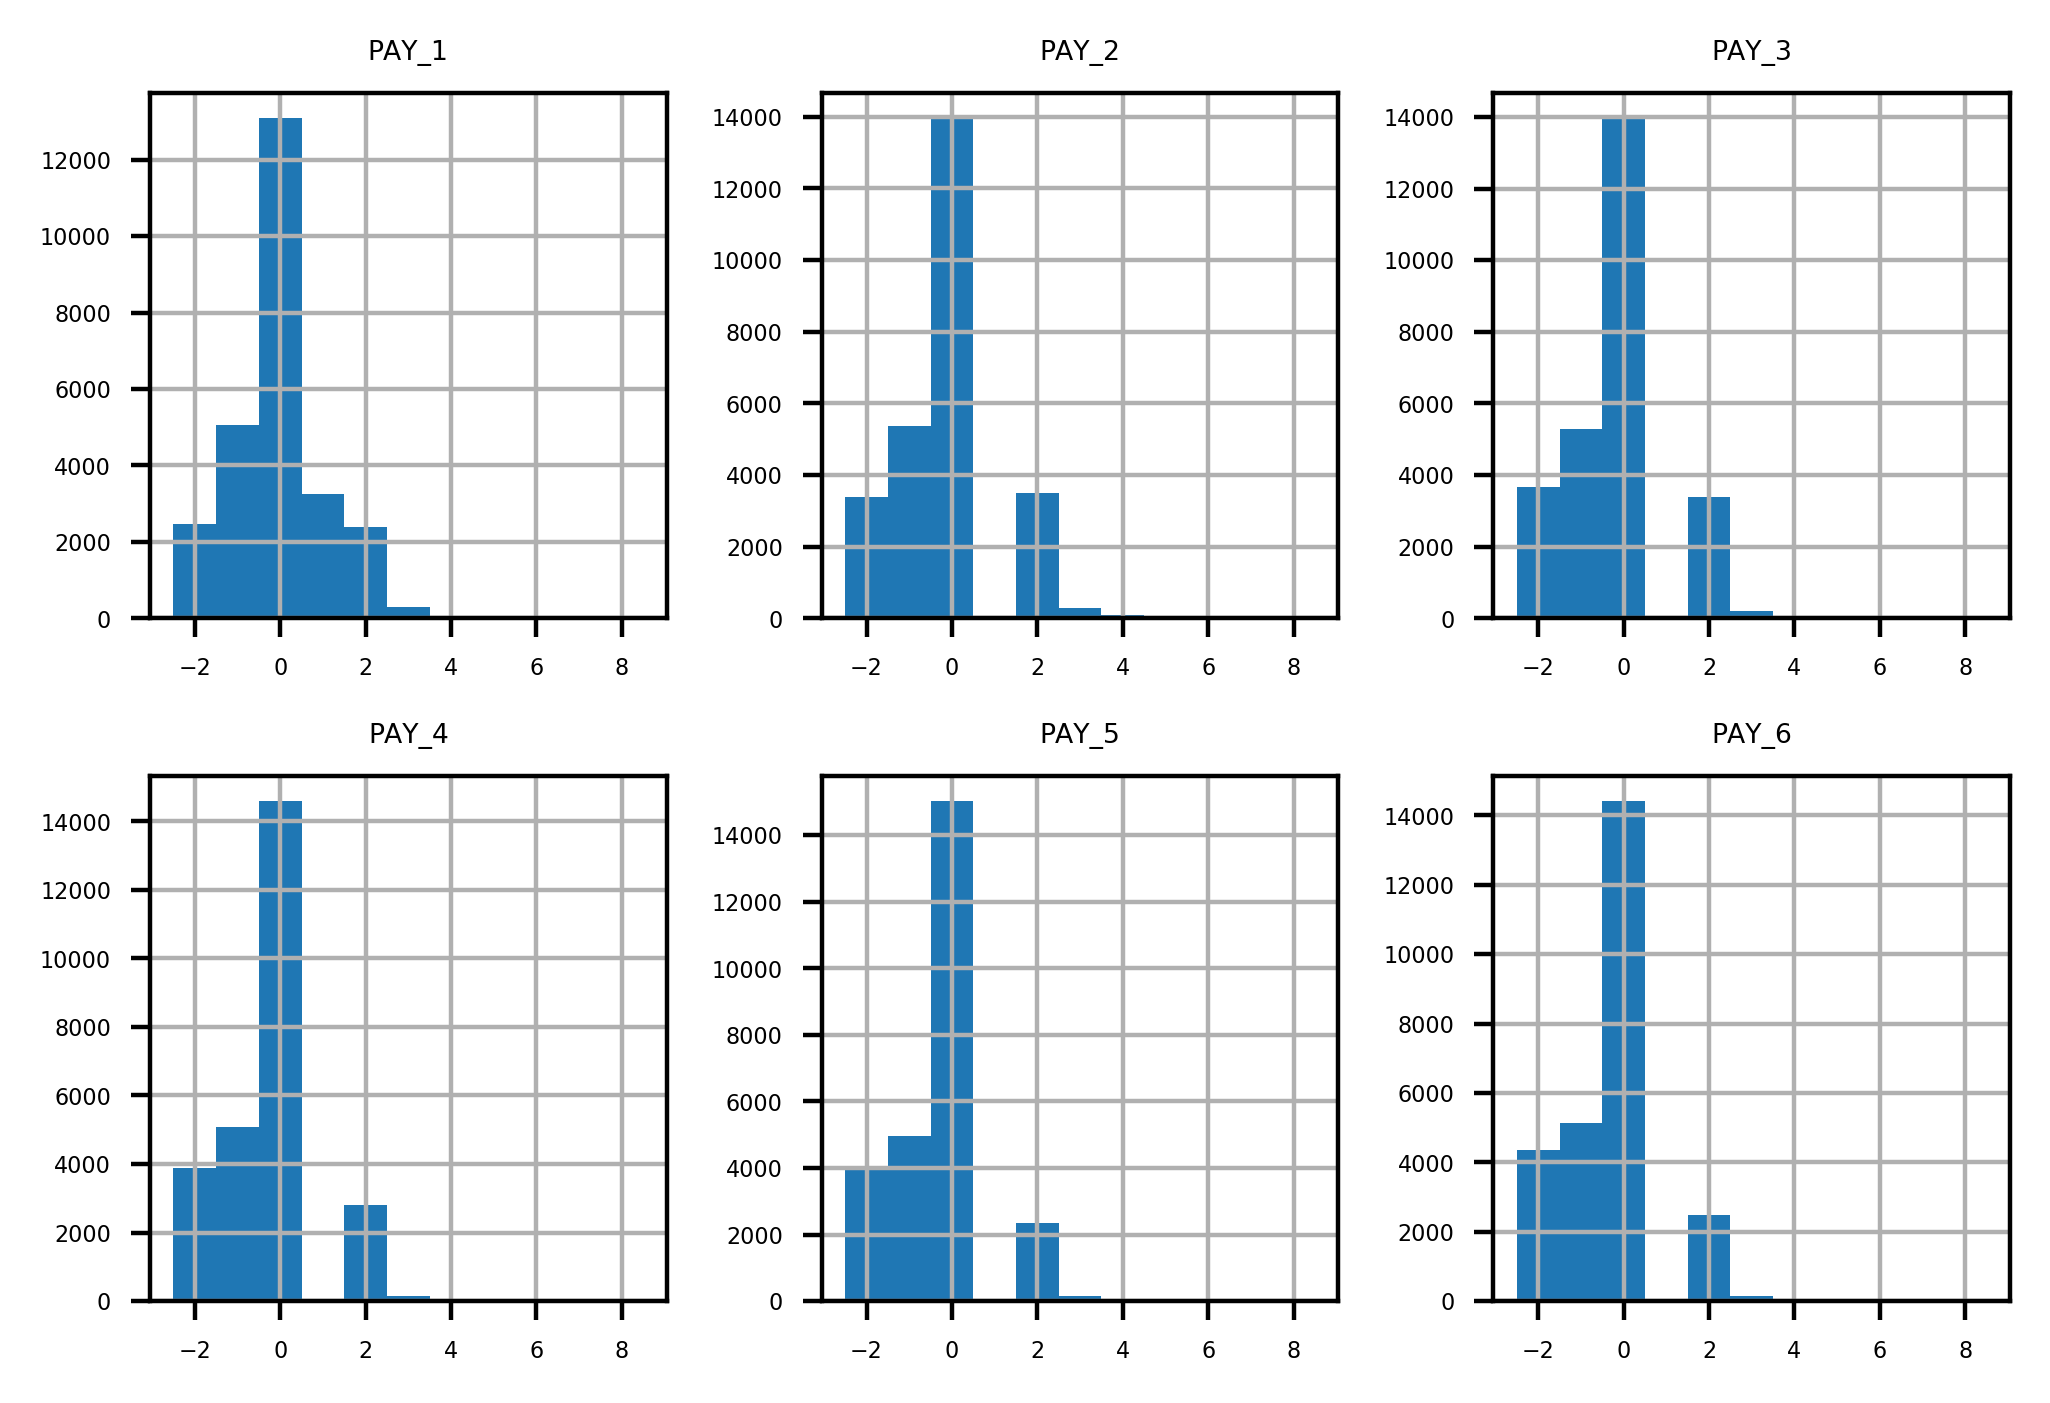

In [61]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [62]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


## -------------------------------------------------END OF TASK 1 ---------------------------------------------------------